# Naive Bayes on amazon review DataSet

In [1]:
# importing library
import pandas as pd
import numpy as np
import sqlite3

In [2]:
#connecting to pre-processed data 
import sqlite3
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str

#final.to_sql('Reviews', conn, flavor=None, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [3]:
# Loading data from the filtered / processed database
import pandas as pd
filtered_data = pd.read_sql_query("""Select * from reviews """,conn)
filtered_data.head(3)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...


In [4]:
filtered_data['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [5]:
labels = filtered_data['Score']

def lab_to_bin(x):
    if x == 'positive':
        return 1
    else:
        return 0
labels_bin = labels.map(lab_to_bin)

final =  filtered_data['Text']

In [6]:
#Splitting data into train test and cross validation 
from sklearn.cross_validation import train_test_split 

X_1, X_test, y_1, y_test = train_test_split(final, labels_bin, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)



/Users/sapansoni/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Naive Bayes on Bag of Words(BernauliNB)

In [7]:
#Creating bag of words and vectorizing it
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,2)) 
final_counts_tr = count_vect.fit_transform(X_tr.values)
final_counts_cv = count_vect.transform(X_cv.values)
final_counts_test = count_vect.transform(X_test.values)


In [8]:
#We are using BernauliNB since our classifer is Binary classifier

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
#creating loop for finding out the optimal value of alpha
i = 0.001
cv_scores_BN = []
alpha = []
while (i < 1):
    nb = BernoulliNB(alpha= i)
    nb.fit(final_counts_tr,y_tr)
    pred = nb.predict(final_counts_cv)
    
    acc = accuracy_score(y_cv, pred, normalize=True,) * float(100)
    cv_scores_BN.append(acc)
    
    print('\nCV accuracy for BoW BernouliNB alpha = %.3f is %d%%' % (i, acc))
    i += 0.005
    alpha.append(i)


CV accuracy for BoW BernouliNB alpha = 0.001 is 90%

CV accuracy for BoW BernouliNB alpha = 0.006 is 91%

CV accuracy for BoW BernouliNB alpha = 0.011 is 92%

CV accuracy for BoW BernouliNB alpha = 0.016 is 92%

CV accuracy for BoW BernouliNB alpha = 0.021 is 92%

CV accuracy for BoW BernouliNB alpha = 0.026 is 92%

CV accuracy for BoW BernouliNB alpha = 0.031 is 92%

CV accuracy for BoW BernouliNB alpha = 0.036 is 92%

CV accuracy for BoW BernouliNB alpha = 0.041 is 92%

CV accuracy for BoW BernouliNB alpha = 0.046 is 92%

CV accuracy for BoW BernouliNB alpha = 0.051 is 92%

CV accuracy for BoW BernouliNB alpha = 0.056 is 92%

CV accuracy for BoW BernouliNB alpha = 0.061 is 92%

CV accuracy for BoW BernouliNB alpha = 0.066 is 92%

CV accuracy for BoW BernouliNB alpha = 0.071 is 92%

CV accuracy for BoW BernouliNB alpha = 0.076 is 92%

CV accuracy for BoW BernouliNB alpha = 0.081 is 92%

CV accuracy for BoW BernouliNB alpha = 0.086 is 92%

CV accuracy for BoW BernouliNB alpha = 0.091 


CV accuracy for BoW BernouliNB alpha = 0.776 is 86%

CV accuracy for BoW BernouliNB alpha = 0.781 is 86%

CV accuracy for BoW BernouliNB alpha = 0.786 is 86%

CV accuracy for BoW BernouliNB alpha = 0.791 is 86%

CV accuracy for BoW BernouliNB alpha = 0.796 is 86%

CV accuracy for BoW BernouliNB alpha = 0.801 is 86%

CV accuracy for BoW BernouliNB alpha = 0.806 is 86%

CV accuracy for BoW BernouliNB alpha = 0.811 is 86%

CV accuracy for BoW BernouliNB alpha = 0.816 is 86%

CV accuracy for BoW BernouliNB alpha = 0.821 is 86%

CV accuracy for BoW BernouliNB alpha = 0.826 is 86%

CV accuracy for BoW BernouliNB alpha = 0.831 is 86%

CV accuracy for BoW BernouliNB alpha = 0.836 is 86%

CV accuracy for BoW BernouliNB alpha = 0.841 is 86%

CV accuracy for BoW BernouliNB alpha = 0.846 is 86%

CV accuracy for BoW BernouliNB alpha = 0.851 is 86%

CV accuracy for BoW BernouliNB alpha = 0.856 is 86%

CV accuracy for BoW BernouliNB alpha = 0.861 is 86%

CV accuracy for BoW BernouliNB alpha = 0.866 

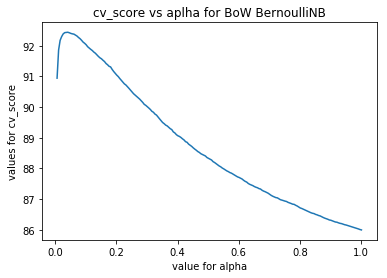

In [10]:
import matplotlib.pyplot as plt
plt.plot(alpha,cv_scores_BN)
plt.xlabel("value for alpha")
plt.ylabel("values for cv_score")
plt.title("cv_score vs aplha for BoW BernoulliNB")
plt.show()


#### various matrics BernauliNB Bag of words classifier

In [11]:
from sklearn.metrics import confusion_matrix
nb1 = BernoulliNB(alpha= 0.011)
model =nb1.fit(final_counts_tr,y_tr)
pred1 = nb1.predict(final_counts_test)
confusion_matrix = confusion_matrix(y_test,pred1)

confusion_matrix

array([[10262,  7003],
       [ 1616, 90371]])

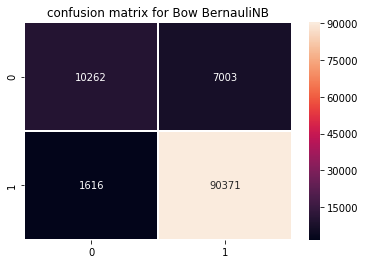

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True,fmt="d",linewidths=.5)
plt.title("confusion matrix for Bow BernauliNB")
plt.show()

In [13]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test,pred1)
print("precision_score for the BoW BernauliNB model is = %f" % (precision_score))

precision_score for the BoW BernauliNB model is = 0.928081


In [14]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test,pred1)
print("recall_score for the BoW BernauliNB model is = %f" % (recall_score))

recall_score for the BoW BernauliNB model is = 0.982432


In [15]:
# F1 = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import f1_score
f1_score=f1_score(y_test,pred1)
print("f1_score for the BoW Bernauli model is = %f" % (f1_score))

f1_score for the BoW Bernauli model is = 0.954484


In [16]:
#finding out  true negative , false positive , false negative and true positve 
tn, fp, fn, tp = confusion_matrix.ravel()
( tp, fp, fn, tp)

(90371, 7003, 1616, 90371)

## Naive Bayes on Bag of Words(MultinomialNB)


In [17]:
#trying our dataset with Multinomial 

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
#creating loop for finding out the optimal value of alpha
i = 0.001
alpha = []
accurac = []
prec_score = []

while (i < 1):
    nb = MultinomialNB(alpha= i)
    nb.fit(final_counts_tr,y_tr)
    pred = nb.predict(final_counts_cv)
    
    acc = accuracy_score(y_cv, pred, normalize=True,) * float(100)
    accurac.append(acc)
    precision = precision_score(y_test,pred1)
    prec_score.append(precision)
    alpha.append(i)
    
    print('\nCV accuracy for BoW MultiNomial alpha = %.3f is %d%%' % (i, acc))
    i += 0.005


CV accuracy for BoW MultiNomial alpha = 0.001 is 91%

CV accuracy for BoW MultiNomial alpha = 0.006 is 92%

CV accuracy for BoW MultiNomial alpha = 0.011 is 92%

CV accuracy for BoW MultiNomial alpha = 0.016 is 92%

CV accuracy for BoW MultiNomial alpha = 0.021 is 92%

CV accuracy for BoW MultiNomial alpha = 0.026 is 92%

CV accuracy for BoW MultiNomial alpha = 0.031 is 93%

CV accuracy for BoW MultiNomial alpha = 0.036 is 93%

CV accuracy for BoW MultiNomial alpha = 0.041 is 93%

CV accuracy for BoW MultiNomial alpha = 0.046 is 93%

CV accuracy for BoW MultiNomial alpha = 0.051 is 93%

CV accuracy for BoW MultiNomial alpha = 0.056 is 93%

CV accuracy for BoW MultiNomial alpha = 0.061 is 93%

CV accuracy for BoW MultiNomial alpha = 0.066 is 93%

CV accuracy for BoW MultiNomial alpha = 0.071 is 93%

CV accuracy for BoW MultiNomial alpha = 0.076 is 93%

CV accuracy for BoW MultiNomial alpha = 0.081 is 93%

CV accuracy for BoW MultiNomial alpha = 0.086 is 93%

CV accuracy for BoW MultiNo


CV accuracy for BoW MultiNomial alpha = 0.761 is 91%

CV accuracy for BoW MultiNomial alpha = 0.766 is 91%

CV accuracy for BoW MultiNomial alpha = 0.771 is 91%

CV accuracy for BoW MultiNomial alpha = 0.776 is 91%

CV accuracy for BoW MultiNomial alpha = 0.781 is 91%

CV accuracy for BoW MultiNomial alpha = 0.786 is 91%

CV accuracy for BoW MultiNomial alpha = 0.791 is 91%

CV accuracy for BoW MultiNomial alpha = 0.796 is 91%

CV accuracy for BoW MultiNomial alpha = 0.801 is 91%

CV accuracy for BoW MultiNomial alpha = 0.806 is 91%

CV accuracy for BoW MultiNomial alpha = 0.811 is 91%

CV accuracy for BoW MultiNomial alpha = 0.816 is 91%

CV accuracy for BoW MultiNomial alpha = 0.821 is 91%

CV accuracy for BoW MultiNomial alpha = 0.826 is 91%

CV accuracy for BoW MultiNomial alpha = 0.831 is 91%

CV accuracy for BoW MultiNomial alpha = 0.836 is 91%

CV accuracy for BoW MultiNomial alpha = 0.841 is 91%

CV accuracy for BoW MultiNomial alpha = 0.846 is 91%

CV accuracy for BoW MultiNo

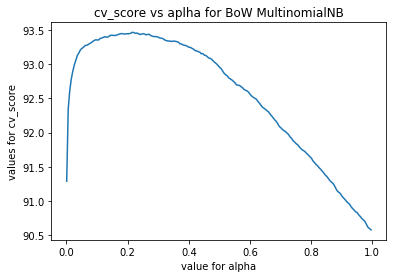

In [18]:
plt.plot(alpha,accurac)
plt.xlabel("value for alpha")
plt.ylabel("values for cv_score")
plt.title("cv_score vs aplha for BoW MultinomialNB")
plt.show()


#### Various matrics for Naive Bayes Bag of words classifier

In [19]:
from sklearn.metrics import confusion_matrix
nb1 = BernoulliNB(alpha= 0.011)
model =nb1.fit(final_counts_tr,y_tr)
pred1 = nb1.predict(final_counts_test)
confusion_matrix = confusion_matrix(y_test,pred1)

confusion_matrix

array([[10262,  7003],
       [ 1616, 90371]])

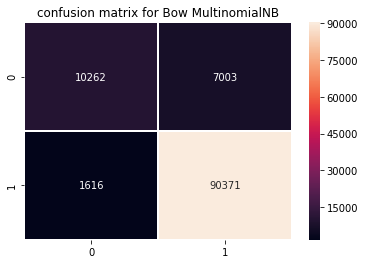

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True,fmt="d",linewidths=.5)
plt.title("confusion matrix for Bow MultinomialNB")
plt.show()

In [21]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test,pred1)
print("precision_score for the BoW MultinomialNB model is = %f" % (precision_score))

precision_score for the BoW MultinomialNB model is = 0.928081


In [22]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test,pred1)
print("recall_score for the BoW MultinomialNB model is = %f" % (recall_score))

recall_score for the BoW MultinomialNB model is = 0.982432


In [23]:
# F1 = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import f1_score
f1_score=f1_score(y_test,pred1)
print("f1_score for the MultinomialNB BoW model is = %f" % (f1_score))

f1_score for the MultinomialNB BoW model is = 0.954484


In [24]:
#finding out  true negative , false positive , false negative and true positve 
tn, fp, fn, tp = confusion_matrix.ravel()
( tp, fp, fn, tp)

(90371, 7003, 1616, 90371)

In [25]:
# We will find out feature importance for both +ve and -ve class
words = count_vect.get_feature_names()
#
likelihood_df = pd.DataFrame(model.feature_log_prob_.transpose(),columns=['Negative','Positive'],index=words)

#To find the words with the highest and lowest values of RP, we just need to invert the log operation(exp)
#take the difference of the probabilities, and extract the top and bottom 10.

likelihood_df = likelihood_df.eval('(exp(Positive) - exp(Negative))')



In [26]:
#top_10 defines top features of postive class
top_10_pos = likelihood_df.sort_values(ascending=False).iloc[:10]
print("Top features for the +ve class are as belows")
print(top_10_pos)

Top features for the +ve class are as belows
great        0.182614
love         0.108725
best         0.092133
the best     0.084219
good         0.068030
delicious    0.065938
my           0.064270
perfect      0.052237
is           0.050924
this is      0.050168
dtype: float64


In [27]:
#bottom_10 they are least used feature for +ve class which means they are top features for the negative class

bottom_10 = likelihood_df.sort_values().iloc[:10].sort_values(ascending=False)

print("Top features for -ve class are as below")
print(bottom_10)

Top features for -ve class are as below
bad       -0.075125
what      -0.077374
product   -0.080369
were      -0.084009
be        -0.085231
had       -0.096974
would     -0.099351
but       -0.104449
was       -0.188453
not       -0.242145
dtype: float64


## Naive Bayes on TF-IDF(BernoliNB)

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_tr = tf_idf_vect.fit_transform(X_tr.values)
tf_idf_cv = tf_idf_vect.transform(X_cv.values)
tf_idf_test = tf_idf_vect.transform(X_test.values)

In [29]:
#We are using BernauliNB since our classifer is Binary classifier

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
#creating loop for finding out the optimal value of alpha
alpha = []
cv_score = []
i = 0.001
while (i < 1):
    nb = BernoulliNB(alpha= i)
    nb.fit(tf_idf_tr,y_tr)
    pred = nb.predict(tf_idf_cv)
    
    acc = accuracy_score(y_cv, pred, normalize=True,) * float(100)
    cv_score.append(acc)
    print('\nCV accuracy for TF-IDF BernauliNB alpha = %.3f is %d%%' % (i, acc))
    alpha.append(i)
    i += 0.005


CV accuracy for TF-IDF BernauliNB alpha = 0.001 is 90%

CV accuracy for TF-IDF BernauliNB alpha = 0.006 is 91%

CV accuracy for TF-IDF BernauliNB alpha = 0.011 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.016 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.021 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.026 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.031 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.036 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.041 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.046 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.051 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.056 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.061 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.066 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.071 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.076 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.081 is 92%

CV accuracy for TF-IDF BernauliNB alpha = 0.086


CV accuracy for TF-IDF BernauliNB alpha = 0.736 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.741 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.746 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.751 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.756 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.761 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.766 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.771 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.776 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.781 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.786 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.791 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.796 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.801 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.806 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.811 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.816 is 86%

CV accuracy for TF-IDF BernauliNB alpha = 0.821

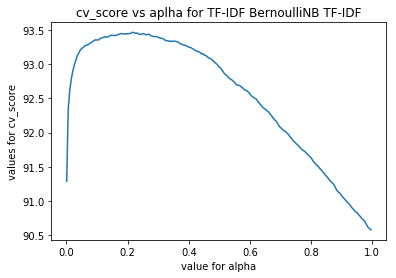

In [30]:
plt.plot(alpha,accurac)
plt.xlabel("value for alpha")
plt.ylabel("values for cv_score")
plt.title("cv_score vs aplha for TF-IDF BernoulliNB TF-IDF")
plt.show()


#### Various matrics for Naive Bayes TF-IDF classifier(BernauliNB)

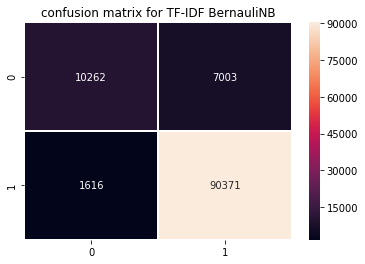

In [31]:
from sklearn.metrics import confusion_matrix
nb1 = BernoulliNB(alpha= 0.011)
model =nb1.fit(tf_idf_tr,y_tr)
pred1 = nb1.predict(tf_idf_test)
confusion_matrix = confusion_matrix(y_test,pred1)
sns.heatmap(confusion_matrix,annot=True,fmt="d",linewidths=.5)
plt.title("confusion matrix for TF-IDF BernauliNB")
plt.show()


In [32]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test,pred1)
print("precision_score for the BernauliNB TF-IDF model is = %f" % (precision_score))

precision_score for the BernauliNB TF-IDF model is = 0.928081


In [33]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test,pred1)
print("recall_score for the BernauliNB TF-IDF model is = %f" % (recall_score))

recall_score for the BernauliNB TF-IDF model is = 0.982432


In [34]:
# F1 = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import f1_score
f1_score=f1_score(y_test,pred1)
print("f1_score for the BernauliNB TF-IDF model is = %f" % (f1_score))

f1_score for the BernauliNB TF-IDF model is = 0.954484


In [35]:
#finding out  true negative , false positive , false negative and true positve 
tn, fp, fn, tp = confusion_matrix.ravel()
( tp, fp, fn, tp)

(90371, 7003, 1616, 90371)

In [36]:
# We will find out feature importance for both +ve and -ve class
words = tf_idf_vect.get_feature_names()  ##check incase error
#
likelihood_df = pd.DataFrame(model.feature_log_prob_.transpose(),columns=['Negative','Positive'],index=words)

#To find the words with the highest and lowest values of RP, we just need to invert the log operation(exp)
#take the difference of the probabilities, and extract the top and bottom 10.

likelihood_df = likelihood_df.eval('(exp(Positive) - exp(Negative))')


In [37]:
#top_10 defines top features of postive class
top_10 = likelihood_df.sort_values(ascending=False).iloc[:10]
print("Top features for the +ve class are as belows")
print(top_10)

Top features for the +ve class are as belows
great        0.182614
love         0.108725
best         0.092133
the best     0.084219
good         0.068030
delicious    0.065938
my           0.064270
perfect      0.052237
is           0.050924
this is      0.050168
dtype: float64


In [38]:
#bottom_10 they are least used feature for +ve class which means they are top features for the negative class
bottom_10 = likelihood_df.sort_values().iloc[:10].sort_values(ascending=False)
print("Top features for -ve class are as below")
print(bottom_10)

Top features for -ve class are as below
bad       -0.075125
what      -0.077374
product   -0.080369
were      -0.084009
be        -0.085231
had       -0.096974
would     -0.099351
but       -0.104449
was       -0.188453
not       -0.242145
dtype: float64


In [39]:
#trying our dataset with Multinomial 

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
#creating loop for finding out the optimal value of alpha
i = 0.001
alpha = []
accurac = []

while (i < 1):
    nb = MultinomialNB(alpha= i)
    nb.fit(tf_idf_tr,y_tr)
    pred = nb.predict(final_counts_cv)
    acc = accuracy_score(y_cv, pred, normalize=True,) * float(100)
    accurac.append(acc)
    alpha.append(i)
    
    
    print('\nCV accuracy for TF-IDF MultiNomial alpha = %.3f is %d%%' % (i, acc))
    i += 0.005


CV accuracy for TF-IDF MultiNomial alpha = 0.001 is 92%

CV accuracy for TF-IDF MultiNomial alpha = 0.006 is 93%

CV accuracy for TF-IDF MultiNomial alpha = 0.011 is 93%

CV accuracy for TF-IDF MultiNomial alpha = 0.016 is 93%

CV accuracy for TF-IDF MultiNomial alpha = 0.021 is 93%

CV accuracy for TF-IDF MultiNomial alpha = 0.026 is 92%

CV accuracy for TF-IDF MultiNomial alpha = 0.031 is 92%

CV accuracy for TF-IDF MultiNomial alpha = 0.036 is 92%

CV accuracy for TF-IDF MultiNomial alpha = 0.041 is 91%

CV accuracy for TF-IDF MultiNomial alpha = 0.046 is 91%

CV accuracy for TF-IDF MultiNomial alpha = 0.051 is 90%

CV accuracy for TF-IDF MultiNomial alpha = 0.056 is 90%

CV accuracy for TF-IDF MultiNomial alpha = 0.061 is 90%

CV accuracy for TF-IDF MultiNomial alpha = 0.066 is 89%

CV accuracy for TF-IDF MultiNomial alpha = 0.071 is 89%

CV accuracy for TF-IDF MultiNomial alpha = 0.076 is 89%

CV accuracy for TF-IDF MultiNomial alpha = 0.081 is 88%

CV accuracy for TF-IDF MultiNo


CV accuracy for TF-IDF MultiNomial alpha = 0.721 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.726 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.731 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.736 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.741 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.746 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.751 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.756 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.761 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.766 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.771 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.776 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.781 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.786 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.791 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.796 is 84%

CV accuracy for TF-IDF MultiNomial alpha = 0.801 is 84%

CV accuracy for TF-IDF MultiNo

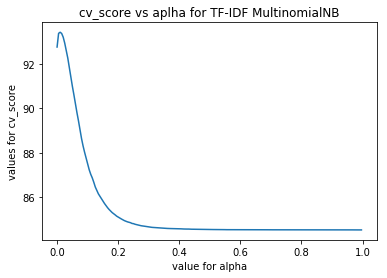

In [40]:
plt.plot(alpha,accurac)
plt.xlabel("value for alpha")
plt.ylabel("values for cv_score")
plt.title("cv_score vs aplha for TF-IDF MultinomialNB")
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix
model =nb1.fit(tf_idf_tr,y_tr)
pred1 = nb1.predict(final_counts_test)
confusion_matrix = confusion_matrix(y_test,pred1)

confusion_matrix

array([[10262,  7003],
       [ 1616, 90371]])

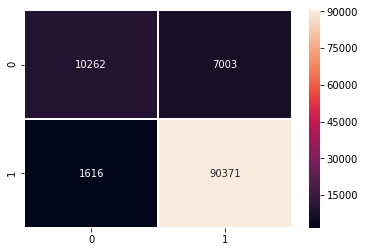

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True,fmt="d",linewidths=.5)
plt.show()

In [43]:
from sklearn.metrics import precision_score
precision_score = precision_score(y_test,pred1)
print("precision_score for the TF-IDF MultinomialNB model is = %f" % (precision_score))

precision_score for the TF-IDF MultinomialNB model is = 0.928081


In [44]:
from sklearn.metrics import recall_score
recall_score = recall_score(y_test,pred1)
print("recall_score for the TF-IDF MultinomialNB model is = %f" % (recall_score))

recall_score for the TF-IDF MultinomialNB model is = 0.982432


In [45]:
# F1 = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import f1_score
f1_score=f1_score(y_test,pred1)
print("f1_score for the TF-IDF MultinomialNB model is = %f" % (f1_score))

f1_score for the TF-IDF MultinomialNB model is = 0.954484


In [46]:
#finding out  true negative , false positive , false negative and true positve 
tn, fp, fn, tp = confusion_matrix.ravel()
tn, fp, fn, tp

(90371, 7003, 1616, 90371)

## Summary

1. We are getting highest accuracy of 93% using MultinomialNB on both BoW and TF-IDF model
2. precision and recall and f1 score for all model is same which is 0.928081, 0.954484 and 0.982432 respectively
3. true Negative , false positive , false negative, true  positive values are same for all model which is 90371, 7003, 1616, 90371 respectively